In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle

In [66]:
solution = pickle.load(open('solutions.pkl','rb'))
ref = pickle.load(open('encoded_reference_solutions.pkl','rb'))
energies = np.array(pickle.load(open('energies.pkl','rb')))

In [67]:
energies = energies.flatten()

In [68]:
idx_sort = np.argsort(energies)
energies = energies[idx_sort]
idx_sort

array([ 5, 61, 55, 79, 74, 28, 50, 94, 27,  6, 21, 67, 13, 39, 34, 42, 44,
       47, 87, 25, 69,  3, 89, 20, 11, 90, 19, 73, 17, 53, 59, 54, 85,  7,
       16, 97, 41, 84, 78, 82, 22, 56, 35, 92, 66, 43, 32, 14, 98,  1, 65,
       57, 71,  9, 46, 10, 72, 88, 48, 51, 40, 62,  2, 52, 64, 75, 81, 76,
       18, 99, 68, 77, 29, 36, 86, 38, 91, 49,  4, 96, 31, 95, 80, 12, 15,
       33, 60, 93, 70, 26, 24,  0,  8, 30, 83, 63, 45, 23, 37, 58])

In [69]:
solution = [solution[i] for i in idx_sort]
# # solution[0]
# idx_sort

In [70]:
ref = [ref[i] for i in idx_sort]

In [71]:
idx = np.argmin(energies)
idx

0

In [72]:
size = 150 * np.exp(-0.5 * (energies-energies.min()))

In [75]:
def plot_solutions(solutions, references, size, best_index):
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax1 = fig.add_subplot(121)

    ax1.axline((0, 0.0), slope=1.10, color="grey", linestyle=(0, (2, 5)))
    ax1.axline((0, 0.0), slope=1, color="black", linestyle=(0, (2, 5)))
    ax1.axline((0, 0.0), slope=0.90, color="grey", linestyle=(0, (2, 5)))
    ax1.grid()

    for r, sol, s in zip(references[:10], solutions[:10], size):
        ax1.scatter(
            r[:2], sol[:2], s=s, lw=1, edgecolors="w",alpha=0.5, facecolors='orange'
        )

    ax1.scatter(
        references[best_index][:2], solutions[best_index][:2], s=150, lw=1, edgecolors="w", facecolors='C0'
    )

    ax1.set_xlabel("Reference Values", fontsize=12)
    ax1.set_ylabel("QUBO Values", fontsize=12)
    ax1.set_title("Flow Rate", fontsize=14)

    ax2 = fig.add_subplot(122)

    ax2.axline((0, 0.0), slope=1.10, color="grey", linestyle=(0, (2, 5)))
    ax2.axline((0, 0.0), slope=1, color="black", linestyle=(0, (2, 5)))
    ax2.axline((0, 0.0), slope=0.90, color="grey", linestyle=(0, (2, 5)))

    for r, sol, s in zip(references[:10], solutions[:10], size):
        ax2.scatter(
            r[2:],
            sol[2:],
            s=s,
            lw=1,
            edgecolors="w",
            alpha=0.5, facecolors='orange'
        )
    ax2.scatter(
        references[best_index][2:], solutions[best_index][2:], s=150, lw=1, edgecolors="w", facecolors='C0'
    )
    ax2.grid()

    ax2.set_xlabel("Reference Values", fontsize=12)
    ax2.set_title("Pressure", fontsize=14)
    plt.show()

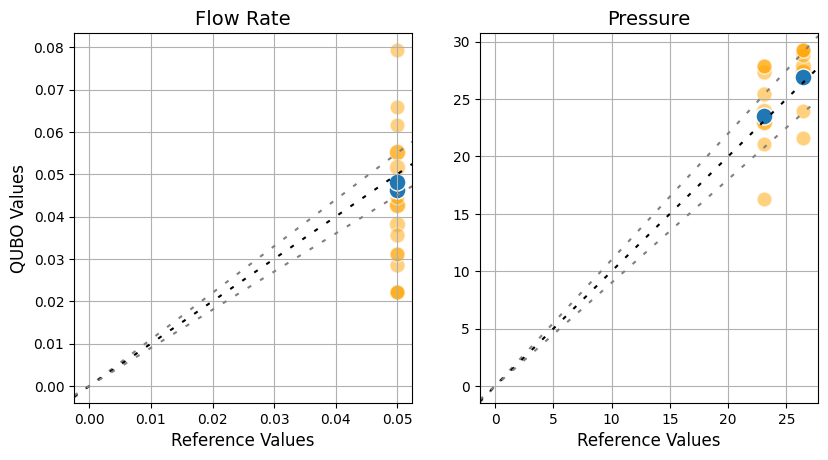

In [76]:
plot_solutions(solution, ref, size, idx)

In [ ]:
import wntr
import wntr_quantum
from wntr_quantum.sampler.simulated_annealing import SimulatedAnnealing
from wntr_quantum.sampler.step.full_random import IncrementalStep
from wntr_quantum.sim.qubo_hydraulics import create_hydraulic_model_for_qubo


# set up the model
inp_file = './networks/Net0.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# create the AML model
model, model_updater = create_hydraulic_model_for_qubo(wn)

# sampler 
sampler = SimulatedAnnealing()

# create the qubo solver
sim = wntr_quantum.sim.QuboPolynomialSolver(wn, flow_encoding=..., head_encoding=...)
res = sim.run_sim(model, sampler=sampler)